In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import csv
from requests import get
from io import BytesIO
from zipfile import ZipFile
#from StringIO import StringIO
#import urllib2
import urllib.request as urllib2

In [9]:
r = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip").read()
file = ZipFile(BytesIO(r))
energy_csv = file.open("household_power_consumption.txt")
df_elc = pd.read_csv(energy_csv, sep = ";")
print(df_elc)

#pd.read_csv("file.txt", sep = "\t")

C:\Users\LONGBRIDGE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

In [10]:
df_elc

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [12]:
df_elc.isnull().values.sum() 

25979

In [13]:
df_elc.isnull().sum() 

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [14]:
df_elc = df_elc.interpolate(method= 'linear' , limit_direction= 'forward' ) 
df_elc.isnull().sum() 

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
df_test = df_elc.copy() 

In [18]:
df_test = df_test.astype(int)
df_test.info()

ValueError: invalid literal for int() with base 10: '16/12/2006'

TypeError: 'value' must be an instance of str or bytes, not a float

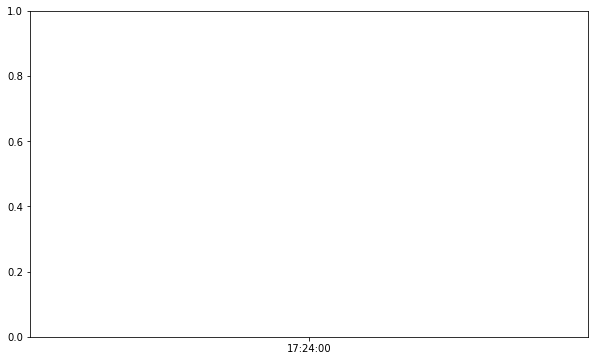

In [16]:
df_test.set_index("Time" , inplace= True) 
plt.figure(figsize=(10 , 6)) 
plt.plot(df_test.index, df_test.Global_active_power, '--' , marker= '*',) 
plt.grid() 
plt.xlabel('Time') 
plt.ylabel('Active Power') 

In [ ]:
#Stationarity check
def augmented_dickey_fuller_statistics(time_series):
result = adfuller(time_series.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
print('\t%s: %.3f' % (key, value))
print('Augmented Dickey-Fuller Test: MaxTemp Time Series')augmented_dickey_fuller_statistics(df_weather['MaxTemp'])
print('Augmented Dickey-Fuller Test: MinTemp Time Series')augmented_dickey_fuller_statistics(df_weather['MinTemp'])
print('Augmented Dickey-Fuller Test: MeanTemp Time Series')augmented_dickey_fuller_statistics(df_weather['MeanTemp'])